In [1]:
from IPython.core.display import display, HTML
display(HTML("""<style> .container {width:96% !important;}</style>"""))
import warnings
warnings.filterwarnings("ignore")

##### https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
# from plotly.offline import init_notebook_mode, iplot
# import cufflinks as cf
# init_notebook_mode()
# cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!ls hp_data

data_description.txt  test.csv
sample_submission.csv train.csv


In [25]:
!cat hp_data/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [14]:
train = pd.read_csv('hp_data/train.csv')
train.shape

(1460, 81)

In [15]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

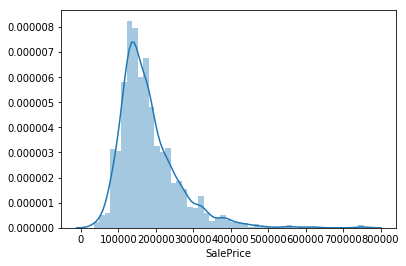

In [21]:
sns.distplot(train['SalePrice'])

In [22]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


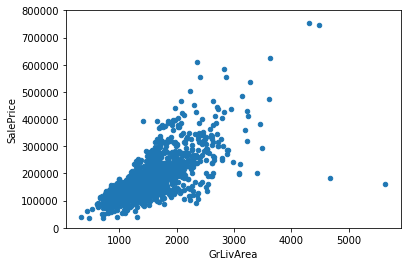

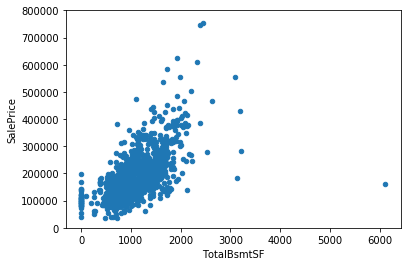

In [34]:
def plot_scatter(x, df = train, y = 'SalePrice', ylim = (0, 800000)):
    return df.plot.scatter(x = x, y = y, ylim = ylim);
                          
plot_scatter('GrLivArea')
plot_scatter('TotalBsmtSF')

> Linear relationship between 'SalePrice' and 'GrLivArea' (Above grade (ground) living area square feet) 

> Strong linear relationship between 'SalePrice' and 'TotalBsmtSF'(Total square feet of basement area)

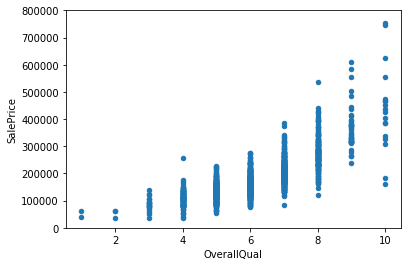

In [32]:
plot_scatter('OverallQual')

In [45]:
# box plot
def plot_box(var, df = train, y = 'SalePrice', ylim = (0, 800000), fs = (8, 6), xticks_rotation = 0):
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize = fs)
    fig = sns.boxplot(x = var, y = "SalePrice", data=data)
    fig.axis(ymin = ylim[0], ymax = ylim[1]);
    plt.xticks(rotation = xticks_rotation)
    return

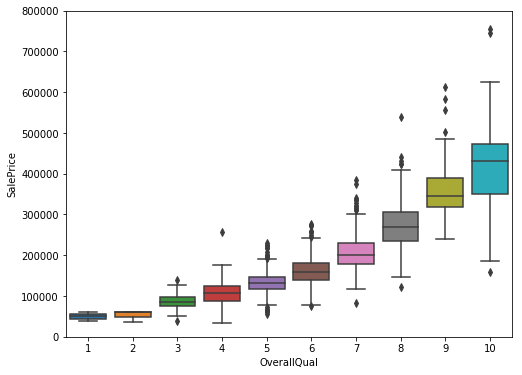

In [43]:
plot_box('OverallQual')

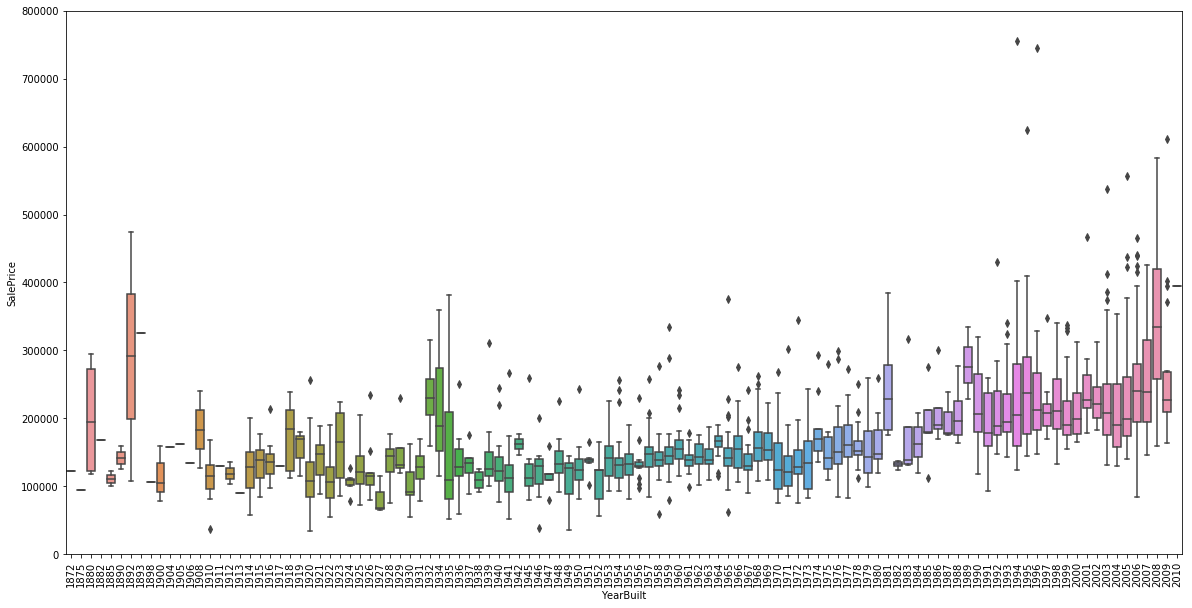

In [46]:
plot_box('YearBuilt', fs = (20, 10), xticks_rotation = 90)

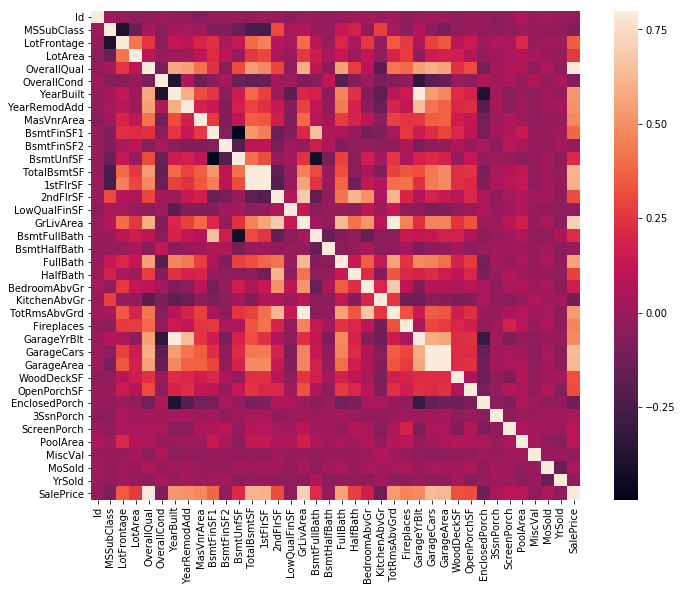

In [57]:
# Correlation matrix (heatmap style)

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

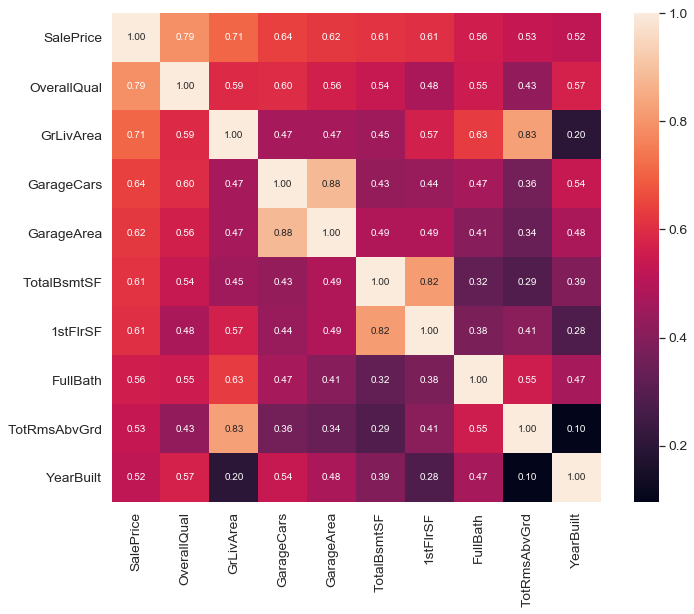

In [63]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

* 'FullBath'?? Really?

* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

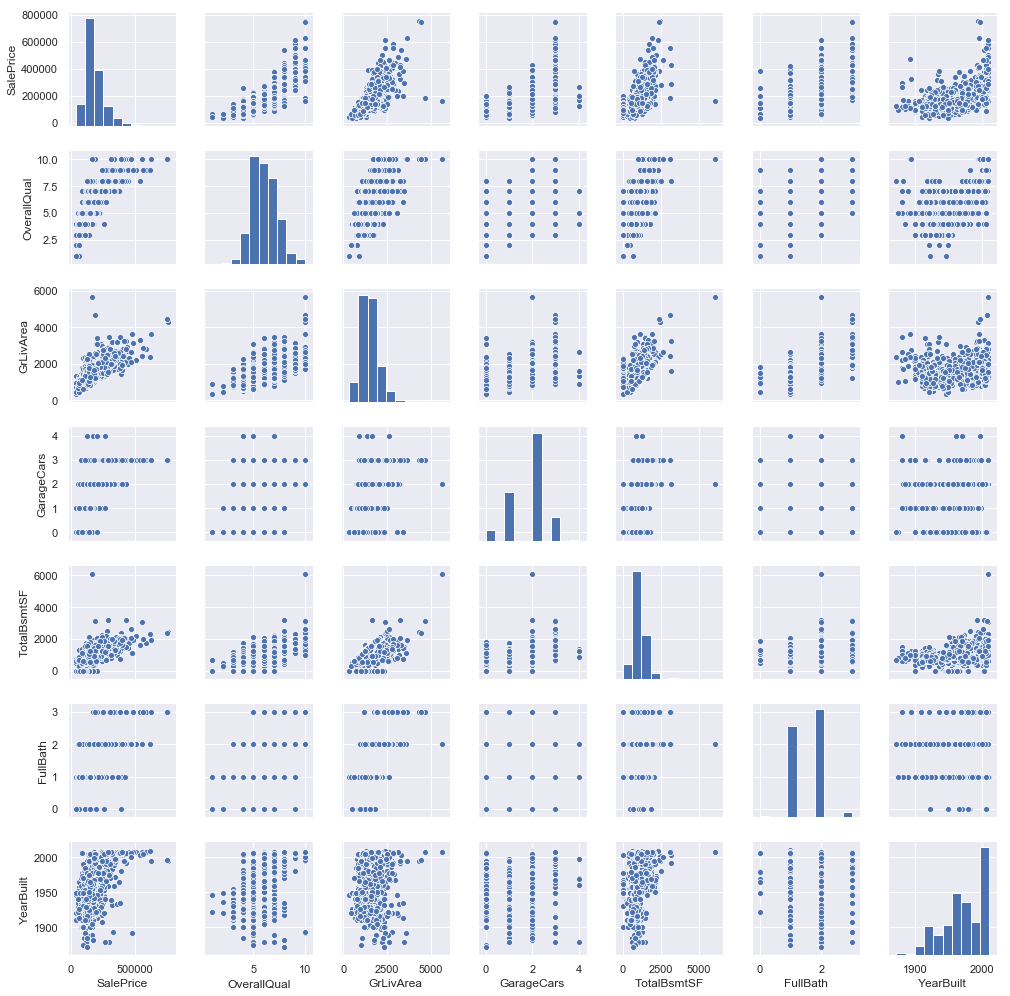

In [68]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2)
plt.show();

In [69]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## Outliner

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.


In [104]:
#standardizing data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
saleprice_scaled = SS.fit_transform(train['SalePrice'].astype(float)[:,np.newaxis]);

SSseries = pd.Series(saleprice_scaled.reshape(len(saleprice_scaled))).sort_values()

print('outer range (low) of the distribution: \n', SSseries.head(10))
print('\nouter range (high) of the distribution: \n', SSseries.tail(10))

outer range (low) of the distribution: 
 495    -1.838704
916    -1.833528
968    -1.800928
533    -1.783299
30     -1.774484
710    -1.623380
1337   -1.617084
705    -1.585604
1325   -1.585604
812    -1.573100
dtype: float64

outer range (high) of the distribution: 
 798     3.828970
178     4.040982
769     4.496348
440     4.710413
1046    4.730321
803     5.062146
898     5.423840
1169    5.591855
1182    7.102899
691     7.228819
dtype: float64


> Low range values are similar and not too far from 0. High range values are far from 0 and the 7.something values are really out of range.

### Bivariate analysis

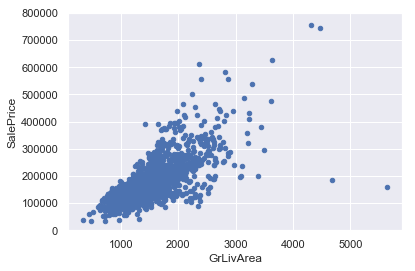

In [106]:
plot_scatter('GrLivArea')

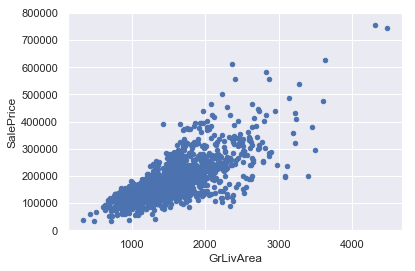

In [124]:
# Remove GrLivArea > 4500
train_r = train[train.GrLivArea < 4500]
plot_scatter('GrLivArea', train_r)

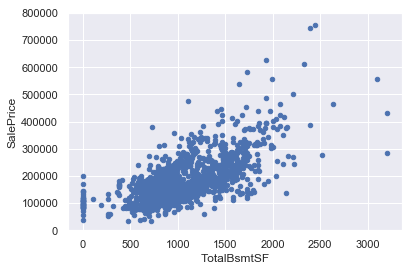

In [125]:
plot_scatter('TotalBsmtSF', train_r)

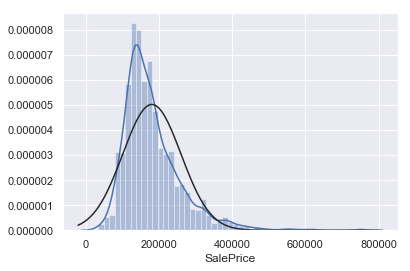

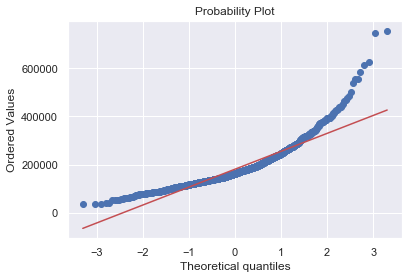

In [126]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(train_r['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(train_r['SalePrice'], plot=plt)

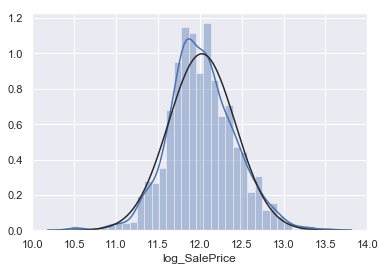

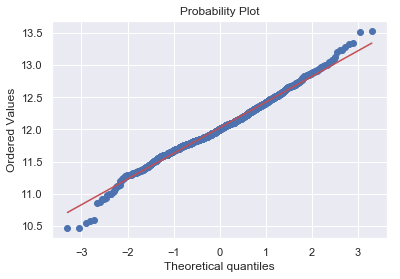

In [127]:
# applying log transformation
train_r['log_SalePrice'] = np.log(train_r['SalePrice'])
sns.distplot(train_r['log_SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_r['log_SalePrice'], plot=plt)

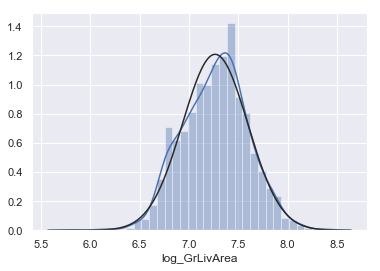

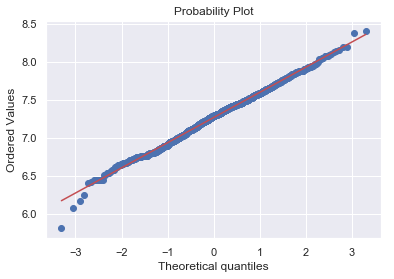

In [142]:
train_r['log_GrLivArea'] = np.log(train_r['GrLivArea'])
sns.distplot(train_r['log_GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_r['log_GrLivArea'], plot=plt)

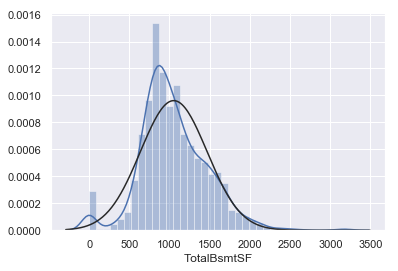

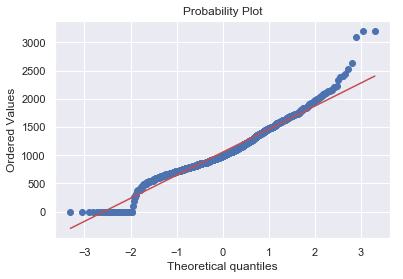

In [128]:
sns.distplot(train_r['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_r['TotalBsmtSF'], plot=plt)

1. skewness
2. value zero (houses without basement)
3. cannot use log for zero value

> Need to create column for new variable (with and without basement!)

In [131]:
# (train_r.TotalBsmtSF <= 0).sum()
train_r['HasBsmt'] = train_r.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
train_r['log_TotalBsmtSF'] = train_r.TotalBsmtSF.apply(lambda x: np.log(x) if x > 0 else 0)

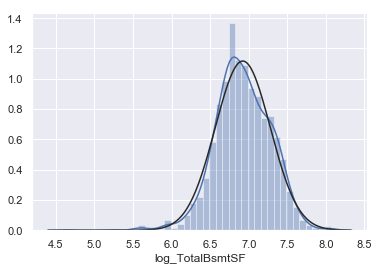

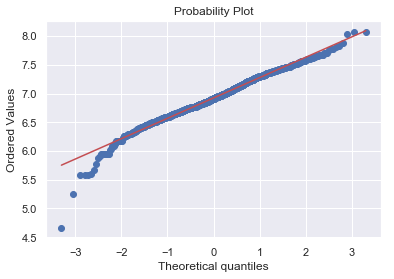

In [136]:
sns.distplot(train_r[train_r['log_TotalBsmtSF']>0]['log_TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_r[train_r['log_TotalBsmtSF']>0]['log_TotalBsmtSF'], plot=plt)

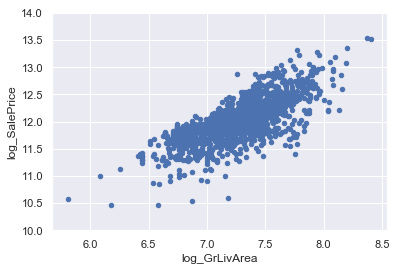

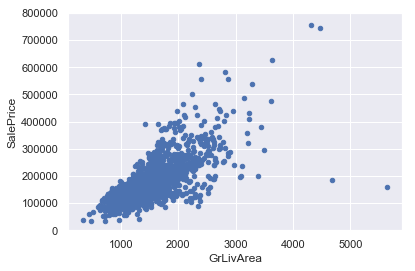

In [144]:
# homoscedasticity

plot_scatter('log_GrLivArea', df = train_r, y = 'log_SalePrice', ylim = (10, 14))
plot_scatter('GrLivArea')

> Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

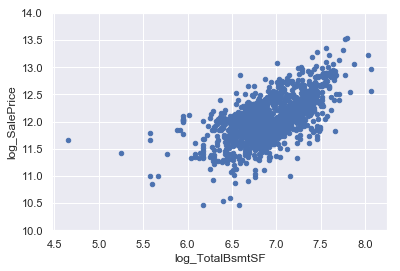

In [148]:
plot_scatter('log_TotalBsmtSF', df = train_r[train_r['log_TotalBsmtSF']>0], y = 'log_SalePrice', ylim = (10, 14))

In [150]:
pd.get_dummies(train_r).shape

(1458, 293)